In [27]:
!pip install geopandas
import geopandas as gpd
import numpy as np

In [28]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load shapefiles

In [29]:
# Read shapefiles
pred_boxes = gpd.read_file('/content/drive/MyDrive/NOVA_course_deep_learning_2/data/tiles/All_predict.shp')

ref_boxes = gpd.read_file('/content/drive/MyDrive/NOVA_course_deep_learning_2/data/map_data/test_annotations2_sun.geojson')
aois = gpd.read_file('/content/drive/MyDrive/NOVA_course_deep_learning_2/data/map_data/aois_todas_areas.geojson')  # Shapefile containing multiple AOIs


# plots

<ipython-input-40-50be49dff044>:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


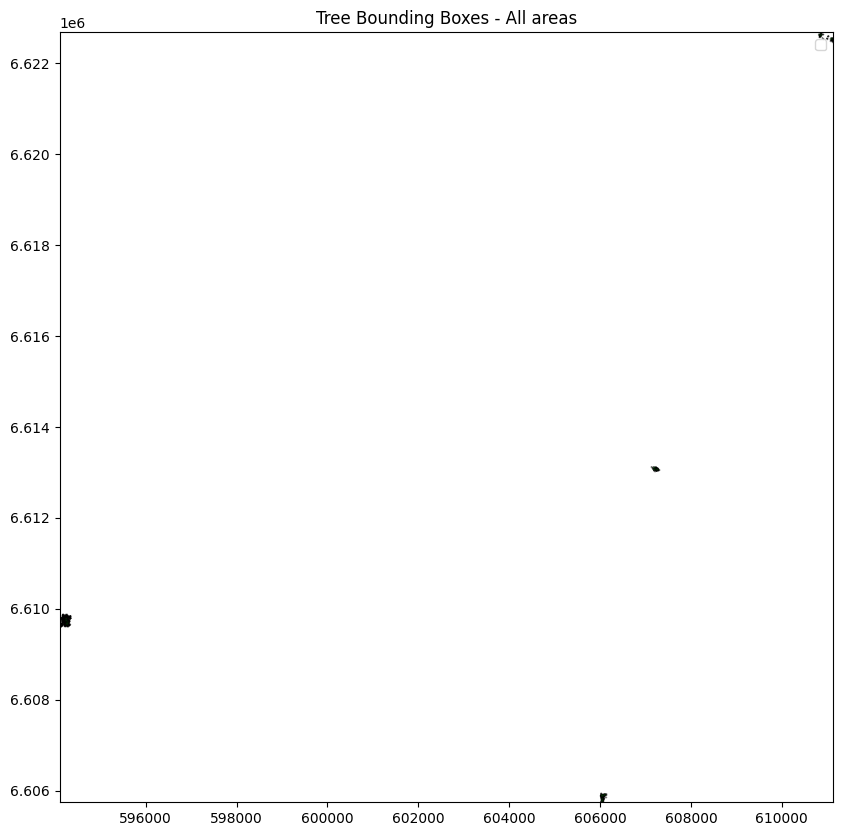

In [40]:
import matplotlib.pyplot as plt

# Plotting the shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot predicted boxes
pred_boxes.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Predicted Boxes')

# Plot reference boxes
ref_boxes.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Reference Boxes')

# Plot AOI
aois.plot(ax=ax, color='green', edgecolor='black', alpha=0.5, label='AOI')

# Zoom to the extent of predicted boxes
ax.set_xlim(pred_boxes.total_bounds[0], pred_boxes.total_bounds[2])
ax.set_ylim(pred_boxes.total_bounds[1], pred_boxes.total_bounds[3])

# Set plot title and legend
plt.title('Tree Bounding Boxes - All areas')
plt.legend()

# Display the plot
plt.show()

# Compute residuals

In [31]:
# Initialize lists to store residuals for each AOI
residuals = []

# Compute residuals for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    residual = num_pred_within_aoi - num_ref_within_aoi
    residuals.append(residual)


In [32]:
residuals

[-111, -95, -62, -133, 61, -58, -76, -76, 15, -35, -32, -26, -25, -211]

# Compute RMSE

In [33]:
# Compute RMSE
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias= np.mean(residuals)
print("the RMSE is: "+ str(rmse))
print("the bias is: "+ str(bias))

the RMSE is: 88.56474629170619
the bias is: -61.714285714285715


In [34]:
aois

,OBJECTID,id,aoi_name,Shape_Leng,Shape_Area,geometry
0,1,NaN,NaN,140.517542,1233.352809,"MULTIPOLYGON (((594269.014 6609757.765, 594234..."
1,2,NaN,NaN,137.616762,1169.424856,"MULTIPOLYGON (((594234.465 6609756.975, 594269..."
2,3,NaN,NaN,141.528455,1240.631755,"MULTIPOLYGON (((594273.794 6609722.675, 594304..."
3,4,NaN,NaN,162.872794,1609.078731,"MULTIPOLYGON (((594258.021 6609690.758, 594295..."
4,5,0,0,192.065410,2254.069948,"MULTIPOLYGON (((607161.156 6613123.886, 607215..."
5,6,0,0,177.434141,1802.596989,"MULTIPOLYGON (((607160.728 6613080.040, 607216..."
6,7,0,0,168.859447,1765.664465,"MULTIPOLYGON (((607235.664 6613083.315, 607281..."
7,8,0,0,202.062471,2518.987395,"MULTIPOLYGON (((606017.894 6605909.634, 606071..."
8,9,0,0,175.033404,1897.546740,"MULTIPOLYGON (((606082.070 6605874.270, 606071..."
9,10,0,0,157.577611,1533.505386,"MULTIPOLYGON (((606030.198 6605831.365, 606064..."


In [35]:



# Print residuals and RMSE
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    print("Residual for AOI"+ str(aoi_name) + ":" +str(residuals[i]))

print("RMSE:"+  str(rmse))

Residual for AOInan:-111
Residual for AOInan:-95
Residual for AOInan:-62
Residual for AOInan:-133
Residual for AOI0:61
Residual for AOI0:-58
Residual for AOI0:-76
Residual for AOI0:-76
Residual for AOI0:15
Residual for AOI0:-35
Residual for AOI0:-32
Residual for AOI0:-26
Residual for AOI0:-25
Residual for AOI0:-211
RMSE:88.56474629170619


# Now we are going to per hectare values

In [36]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [37]:
box_density

[(1394.5725728263849, 2294.5583611038774),
 (1445.1548483289955, 2257.5199997565373),
 (846.3429988380211, 1346.0883886280908),
 (1379.6714591403568, 2206.2313873640837),
 (709.8271290536206, 439.20553610192775),
 (565.8502739981765, 887.608272938316),
 (770.2482701674414, 1200.6811270257174),
 (901.1557597003076, 1202.8642959876354),
 (679.8251514844857, 600.7757152653594),
 (867.2939868094687, 1095.529246496171),
 (755.721151617473, 938.9262792823149),
 (387.21160556152796, 596.9512252406889),
 (281.7845239580516, 431.66990904212156),
 (367.9054025547453, 1544.0878258737039)]

In [38]:

# Print box density for each AOI
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()


Box density for AOInan:
Predicted density (boxes/ha):1394.5725728263849
Reference density (boxes/ha):2294.5583611038774

Box density for AOInan:
Predicted density (boxes/ha):1445.1548483289955
Reference density (boxes/ha):2257.5199997565373

Box density for AOInan:
Predicted density (boxes/ha):846.3429988380211
Reference density (boxes/ha):1346.0883886280908

Box density for AOInan:
Predicted density (boxes/ha):1379.6714591403568
Reference density (boxes/ha):2206.2313873640837

Box density for AOI0:
Predicted density (boxes/ha):709.8271290536206
Reference density (boxes/ha):439.20553610192775

Box density for AOI0:
Predicted density (boxes/ha):565.8502739981765
Reference density (boxes/ha):887.608272938316

Box density for AOI0:
Predicted density (boxes/ha):770.2482701674414
Reference density (boxes/ha):1200.6811270257174

Box density for AOI0:
Predicted density (boxes/ha):901.1557597003076
Reference density (boxes/ha):1202.8642959876354

Box density for AOI0:
Predicted density (boxes/

In [39]:

# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("relative RMSE of box density (%):"+ str(rmse_rel))

print("bias of box density (boxes/ha):"+ str(bias))
print("relative bias of box density (%):"+ str(bias_rel))


RMSE of box density (boxes/ha):560.4646519429477
relative RMSE of box density (%):46.04027675151789
bias of box density (boxes/ha):-406.4380311476777
relative bias of box density (%):-33.38751047280313
